In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, Matrix, solve, simplify

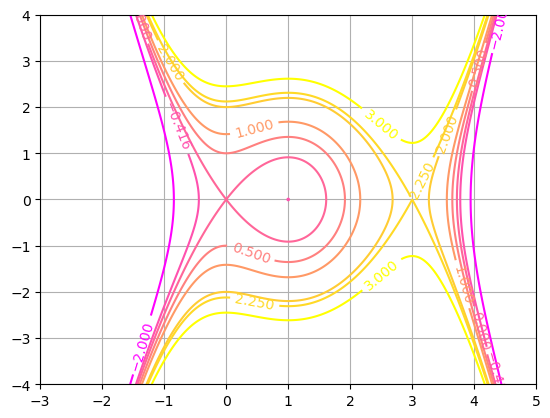

In [161]:
def H(u,du):
  return 1/2*du**2 - u**4/4+4*u**3/3-3*u**2/2

u = np.linspace(-3,5, 1000)
du = np.linspace(-4,4, 1000)

U,dU = np.meshgrid(u,du)

C = H(U,dU)

C_values = [-2,-0.4165,0,0.5,1,2,2.25,3]

contours = plt.contour(U,dU,C,levels=C_values, cmap='spring')
plt.clabel(contours)
plt.grid(True)

In [52]:
u, v = symbols('u v')

stat_points = solve([v, u**3-4*u**2+3*u], [u, v])

print("Точки равновесия(устойчивые и неустойчивые):")
for point in stat_points:
    print(f"u = {point[0]}, v = {point[1]}")

Стационарные точки:
u = 0, v = 0
u = 1, v = 0
u = 3, v = 0


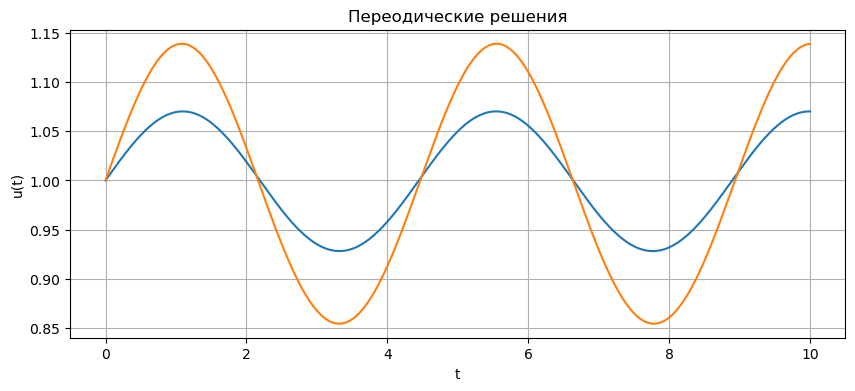

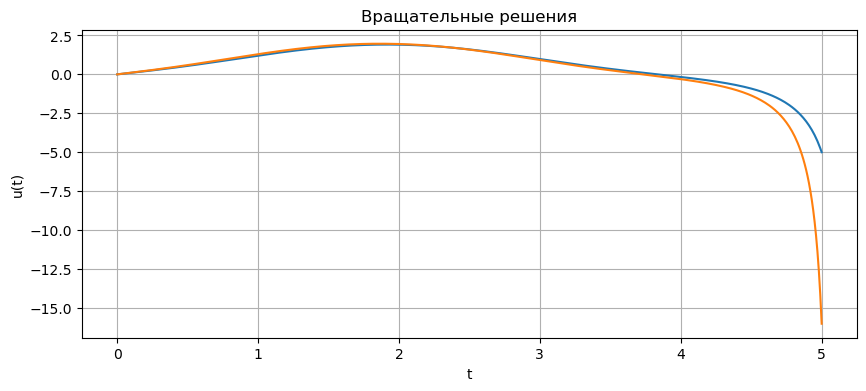

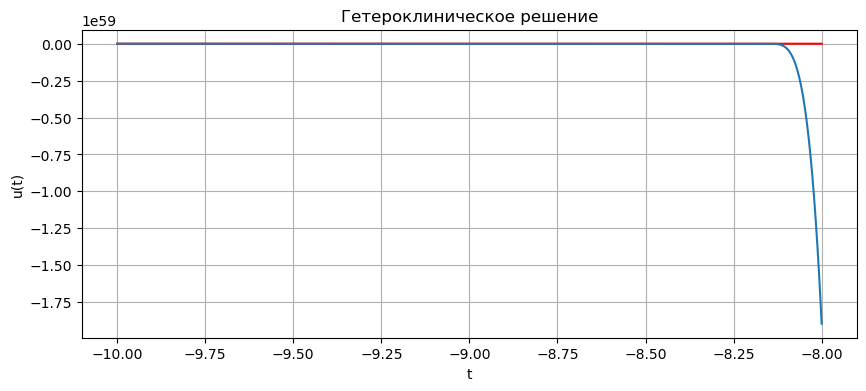

In [174]:
def f(t,y):
    u,u_ = y
    return [u_,u**3-4*u**2+3*u]

# Переодические решения
t_1 = [0, 10]
sol = solve_ivp(f, t_1, [1, 0.1], dense_output=True)
t__1 = np.linspace(0, 10, 500)
u, u_ = sol.sol(t__1)

sol1 = solve_ivp(f, t_1, [1, 0.2], dense_output=True)
u1, u_1 = sol1.sol(t__1)

plt.figure(figsize=(10, 4))
plt.plot(t__1, u)
plt.plot(t__1, u1)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Переодические решения')
plt.grid(True)

# Вращательные решения
t_2 = [0, 10]
t__2 = np.linspace(0, 5, 500)
sol2 = solve_ivp(f, t_2, [0, 1], dense_output=True)
u2, u_2 = sol2.sol(t__2)

sol3 = solve_ivp(f, t_2, [0, 1.1], dense_output=True)
u3, u_3 = sol3.sol(t__2)

plt.figure(figsize=(10, 4))
plt.plot(t__2, u2)
plt.plot(t__2, u3)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Вращательные решения')
plt.grid(True)


# Гетереклиническая траектория(сомнительно)
t_3 = (-10, -8)
t__3 = np.linspace(t_3[0], t_3[1], 2000)
epsilon = 1e-9
# Здесь используем собственные векторы матрицы якоби в точках равновесия
sol4 = solve_ivp(f, t_3, [1 + epsilon, epsilon + np.sqrt(3)],atol=1e-8, rtol=1e-8, dense_output=True)
u4, u_4 = sol4.sol(t__3)

sol5 = solve_ivp(f, t_3, [1 + epsilon, epsilon - np.sqrt(3)],atol=1e-8, rtol=1e-8, dense_output=True)
u5, u_5 = sol5.sol(t__3)

plt.figure(figsize=(10, 4))
plt.plot(t__3, u4, color="red")
plt.plot(t__3, u5)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Гетероклиническое решение')
plt.grid(True)


In [166]:
u = 3
J = np.array([[0,1],[3*u**2-8*u+3,0]])
print("Нормированный вектор в точке 3:")
np.linalg.eig(J)[1]

Нормированный вектор в точке 3:


array([[ 0.37796447, -0.37796447],
       [ 0.9258201 ,  0.9258201 ]])

In [165]:
u = 0
J = np.array([[0,1],[3*u**2-8*u+3,0]])
print("Нормированный вектор в точке 0:")
np.linalg.eig(J)[1]

Нормированный вектор в точке 0:


array([[ 0.5      , -0.5      ],
       [ 0.8660254,  0.8660254]])

In [169]:
u = 1
J = np.array([[0,1],[3*u**2-8*u+3,0]])
print("Нормированный вектор в точке 1:")
np.linalg.eig(J)[1]

Нормированный вектор в точке 1:


array([[0.        -0.57735027j, 0.        +0.57735027j],
       [0.81649658+0.j        , 0.81649658-0.j        ]])